In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Nel paper tolgono la prima e l'ultima energia per il plot!

In [79]:
path = "./results/"

energy = [
    0, 
    0.1, 
    0.3, 
    0.6, 
    1, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    8, 
    9, 
    10
]

files = [
    f"e_{e}mev_results_resnet115.txt"
    for e in energy
]
files

['e_0mev_results_resnet115.txt',
 'e_0.1mev_results_resnet115.txt',
 'e_0.3mev_results_resnet115.txt',
 'e_0.6mev_results_resnet115.txt',
 'e_1mev_results_resnet115.txt',
 'e_2mev_results_resnet115.txt',
 'e_3mev_results_resnet115.txt',
 'e_4mev_results_resnet115.txt',
 'e_5mev_results_resnet115.txt',
 'e_6mev_results_resnet115.txt',
 'e_7mev_results_resnet115.txt',
 'e_8mev_results_resnet115.txt',
 'e_9mev_results_resnet115.txt',
 'e_10mev_results_resnet115.txt']

In [80]:
resolution = []
err_resolution = []
bias = []
err_bias = []

for file in files:
    r = np.loadtxt(path+file)
    resolution.append(r[0])
    err_resolution.append(r[1])
    bias.append(r[2])
    err_bias.append(r[3])
    
results = pd.DataFrame(
    {
        "energy":         energy,
        "resolution":     resolution,
        "err_resolution": err_resolution,
        "bias":           bias,
        "err_bias":       err_bias
    }
)

results

,energy,resolution,err_resolution,bias,err_bias
0,0.0,0.045885,0.000297,0.089211,0.000297
1,0.1,0.042975,0.000268,0.063527,0.000268
2,0.3,0.037897,0.000232,0.036283,0.000232
3,0.6,0.032667,0.000187,0.021528,0.000187
4,1.0,0.028270,0.000137,0.014361,0.000137
5,2.0,0.022794,0.000114,0.005043,0.000114
6,3.0,0.019679,0.000104,0.000196,0.000104
7,4.0,0.017742,0.000069,-0.002231,0.000069
8,5.0,0.016368,0.000079,-0.003562,0.000079
9,6.0,0.015295,0.000080,-0.004284,0.000080


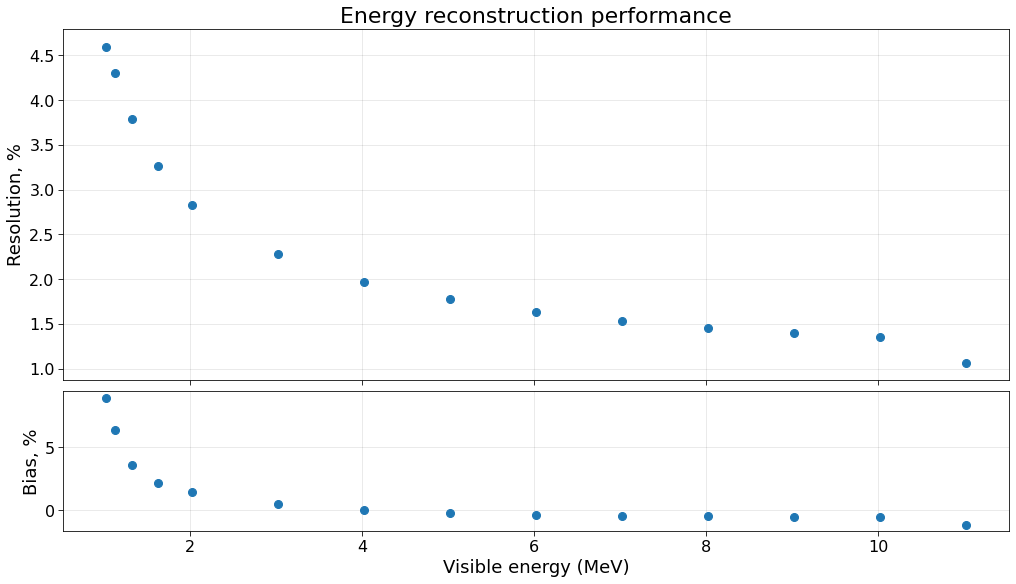

In [81]:
fig = plt.figure(figsize=(14,8), constrained_layout=True)

gs = fig.add_gridspec(2, 1, height_ratios=[5, 2]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(color="k", alpha=0.1)
ax2.grid(color="k", alpha=0.1)

ax1.errorbar(
    results.energy + 1.022, 
    results.resolution * 100, 
    yerr=results.err_resolution * 100,
    marker="o",
    ls="none",
    #color="#000000",
    linewidth=0, 
    elinewidth=1, 
    capsize=2, 
    markersize=8
)

ax2.errorbar(
    results.energy + 1.022, 
    results.bias * 100, 
    yerr=results.err_bias * 100,
    marker="o",
    ls="none",
    #color="#000000",
    linewidth=0, 
    elinewidth=1, 
    capsize=2, 
    markersize=8
)

ax1.set_title(f"Energy reconstruction performance", fontsize=22)
ax1.set_ylabel("Resolution, %", fontsize=18)
ax2.set_xlabel("Visible energy (MeV)", fontsize=18)
ax2.set_ylabel("Bias, %", fontsize=18)
ax1.tick_params(axis="both", which="major", labelsize=16, length=5)
ax2.tick_params(axis="both", which="major", labelsize=16, length=5)
ax1.set_xticklabels([])

fig.savefig(f"./plots/performance_resnet115.png", dpi=300, facecolor="white")
plt.show()